In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. 2019 실적데이터

<참고사항> 

1. 취급액 = 판매단가 X 주문량 (취소,반품제외) 
2. 판매가 0원(무형상품)은 추정 제외 
3. 매주 토요일 18:00~18:20은 정보방송시간으로 추정 제외 (당사사정에 따라 ±20 편성 변경 있음)
4. 편성 듀레이션은  10분~60분내외 임 
5. 2020.06월 편성표는 월 ~ 토 6:20 ~ 2:20(익일), 일요일은 6:20 ~ 2:00로 구성 (심야시간대 제외)      
   단, raw data의 19.01.01 ~ 19.10.31은 6:00 ~ 2:00로 운영하였음. 11.01부터 6:20 ~ 2:20 운영

In [3]:
sales = pd.read_csv("2019실적데이터.csv", encoding="utf-8")

In [4]:
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
방송일시     38309 non-null object
노출(분)    21525 non-null float64
마더코드     38309 non-null int64
상품코드     38309 non-null int64
상품명      38309 non-null object
상품군      38309 non-null object
판매단가     38309 non-null object
 취급액     37372 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


In [4]:
sales.rename(columns = {'방송일시' : 'date', "노출(분)" : "onair", "마더코드" : "mothercode", 
                        "상품코드" : "productcode", "상품명" : "product", "상품군" : "group", 
                        "판매단가" : "price", " 취급액 " : "total"}, inplace = True)

In [5]:
# 상품군 '무형' 제외한 dataframe 
# '무형' 판매단가 '-'로 되어 있어서... : 예측할 필요 없음 !!! 

sales2 = sales.loc[sales["group"] != "무형"]

In [6]:
sales2['price'] = sales2['price'].apply(lambda x: int(x.replace(',', '')))
sales2['total'] = sales2['total'].apply(lambda x: int(x.replace(',', '')))

C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# 판매단가 * 주문량 = 취급액 
sales2["sales"] = sales2["total"] / sales2["price"]

C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# 왜 판매량이 정수가 아니지 ...? 
# 여기서 취소/반품 제외한 총 금액이라고 해서 그런가 ...?? 
sales2.head() 

,date,onair,mothercode,productcode,product,group,price,total,sales
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52.606516
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109.548872
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81.754386
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174.310777
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167.218045


< FAQ >

1. 2019년 실적데이터 에서 취급액 50,000원으로 판매단가가 취급액보다 더 큰 상품의 데이터 값의 의미?            

- 2019년 실적데이터에서 취급액이 50,000원인 데이터는 데이터 정제과정에서 발생된 오류값으로.           
  취급액이 50,000원에 해당되는 상품에 대한 취급액은 0원으로 변경(주문량 0인 값)           
  ※ 해당내용을 반영한 데이터는 추후 수정하여 업데이트 예정

 

2. 취급액 = 판매단가 X 주문량 에서 주문량이 소수점으로 나오는 이유는?

- 일반적으로 취급액의 수식을 적용하면 일반적으로 판매단가X주문량이 맞습니다.           
  실제 현업에서 실적을 집계할때 고객이 실제 주문한 금액을 합산해서 보고있기 때문에 수식을 적용한것과는 차이가 있을 수 있습니다.          
  고객이 상품을 구매할때 판매가를 그대로 지불하지 않고 할인쿠폰 적용, ARS할인, 일시불할인, 카드사할인 등 여러가지 경로로 할인된 금액을 지불하고있습니다.        
  (단, 결제시 적립금, 상품권 등을 사용하여 실결제금액이 바뀌는 경우는 해당사항 없음)              
  이에 주문량이 소수점으로 발생할 수 있음을 참고하여 주시기 바랍니다.

In [12]:
# 방송시간의 경우 NaN 값은 앞의 값으로 채워주면 됨 ! 
sales2["onair"] = sales2["onair"].fillna(method='ffill')

C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
sales2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 9 columns):
date           37372 non-null object
onair          37372 non-null float64
mothercode     37372 non-null int64
productcode    37372 non-null int64
product        37372 non-null object
group          37372 non-null object
price          37372 non-null int64
total          37372 non-null int64
sales          37372 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.9+ MB


## 1) 상품군 

In [14]:
sales2["group"].nunique()

11

Text(0, 0.5, 'Count of 상품군')

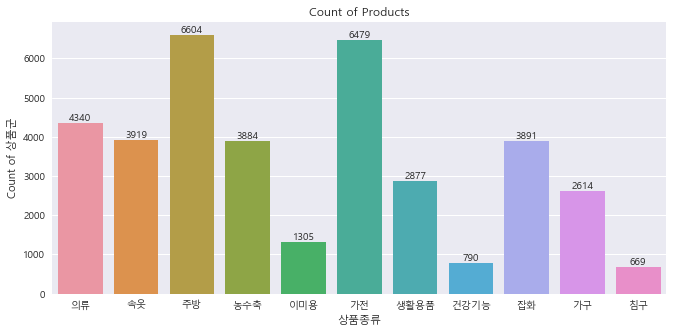

In [15]:
plt.figure(figsize = (11, 5))
plot = sns.countplot(x = 'group', data = sales2)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of Products")
plt.xlabel("상품종류")
plt.ylabel("Count of 상품군")

### 의류

In [16]:
clothes = sales2.loc[sales2["group"] == "의류"]

In [17]:
clothes.loc[clothes["mothercode"] == 100346] # 같은 브랜드끼리 같은 mothercode 공유 

,date,onair,mothercode,productcode,product,group,price,total,sales
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52.606516
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109.548872
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81.754386
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174.310777
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167.218045
...,...,...,...,...,...,...,...,...,...
31707,2019-10-26 15:00,20.0,100346,201080,테이트 여성 오가닉 약기모티,의류,69900,6889000,98.555079
31708,2019-10-26 15:20,20.0,100346,201073,테이트 남성 오가닉 약기모티,의류,69900,8069000,115.436338
31709,2019-10-26 15:20,20.0,100346,201080,테이트 여성 오가닉 약기모티,의류,69900,16166000,231.273247
31710,2019-10-26 15:40,20.0,100346,201073,테이트 남성 오가닉 약기모티,의류,69900,11337000,162.188841


In [20]:
clothes.loc[clothes["mothercode"] == 100808]

,date,onair,mothercode,productcode,product,group,price,total,sales
9,2019-01-01 8:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000,269.332220
10,2019-01-01 8:20,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,30061000,501.853088
11,2019-01-01 8:40,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,53542000,893.856427
368,2019-01-05 11:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,27914000,466.010017
369,2019-01-05 11:20,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,46347000,773.739566
...,...,...,...,...,...,...,...,...,...
36558,2019-12-14 1:40,17.0,100808,202374,CERINI by PAT 남성 기모 릴렉스팬츠,의류,69900,9256000,132.417740
36559,2019-12-14 2:00,20.0,100808,202374,CERINI by PAT 남성 기모 릴렉스팬츠,의류,69900,16396000,234.563662
36706,2019-12-15 9:20,20.0,100808,202374,CERINI by PAT 남성 기모 릴렉스팬츠,의류,69900,19900000,284.692418
36707,2019-12-15 9:40,20.0,100808,202374,CERINI by PAT 남성 기모 릴렉스팬츠,의류,69900,39191000,560.672389


In [21]:
# 총 120개의 의류 브랜드를 취급하고 
clothes["mothercode"].nunique() 

120

In [22]:
# 각 브랜드들이 홈쇼핑에 출연하는 횟수 
clothes.groupby("mothercode").size().describe()

count    120.000000
mean      36.166667
std       46.352202
min        3.000000
25%        9.000000
50%       18.000000
75%       36.250000
max      268.000000
dtype: float64

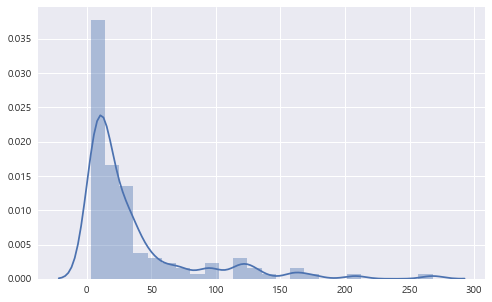

In [23]:
plt.figure(figsize = (8, 5))
sns.distplot(clothes.groupby("mothercode").size())

In [24]:
clothes = pd.merge(clothes, pd.DataFrame(clothes.groupby("mothercode").size()), on = "mothercode", how = "left")
clothes = clothes.rename(columns = {0 : 'BrandCount'})

In [25]:
clothes.loc[clothes["BrandCount"] == 268].head() # 최다출연 브랜드는 K-SWISS 

,date,onair,mothercode,productcode,product,group,price,total,sales,BrandCount
74,2019-01-05 23:00,20.0,100251,200842,K-SWISS 남성기모티셔츠 5종,의류,69000,23644000,342.666667,268
75,2019-01-05 23:00,20.0,100251,200855,K-SWISS 여성기모티셔츠 5종,의류,69000,5991000,86.826087,268
76,2019-01-05 23:20,20.0,100251,200842,K-SWISS 남성기모티셔츠 5종,의류,69000,25823000,374.246377,268
77,2019-01-05 23:20,20.0,100251,200855,K-SWISS 여성기모티셔츠 5종,의류,69000,8850000,128.260870,268
78,2019-01-05 23:40,20.0,100251,200842,K-SWISS 남성기모티셔츠 5종,의류,69000,20692000,299.884058,268


In [26]:
clothes.groupby(["mothercode", "productcode"]).size() # 각각 브랜드마다 취급하는 상품의 종류의 개수.. 를 구해보고 싶었는데... 코딩의 한계 ... ㅠㅠ 

mothercode  productcode
100042      200115         24
100043      200116          3
            200117          2
            200118          3
            200119          2
                           ..
100819      202413          3
100820      202415          3
            202416          3
100821      202418          6
100822      202422         11
Length: 362, dtype: int64

In [ ]:
clothes.groupby(["mothercode", "productcode"]).groups

In [ ]:
Product = {}
for (mothercode, productcode) in clothes.groupby(["mothercode", "productcode"]).groups : 
    Product[mothercode] = productcode # 이렇게 되면 마지막값으로 되서... length를 구하고 싶은데 ㅜㅜ 

#### 판매량 (Sales)

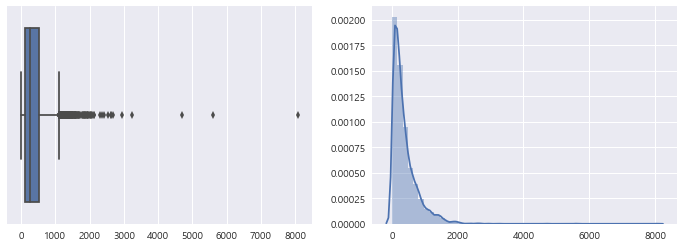

In [27]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(clothes[["sales"]], ax=ax1)
sns.distplot(clothes[["sales"]],ax=ax2)

In [28]:
clothes.sort_values("sales", ascending=False).head(10) # 코몽트...??? 8000개 팔림...!! 

,date,onair,mothercode,productcode,product,group,price,total,sales,BrandCount
4071,2019-12-07 1:40,17.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,322009000,8070.401003,37
4243,2019-12-21 17:40,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,223492000,5601.303258,37
4116,2019-12-11 0:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,187419000,4697.218045,37
4074,2019-12-07 9:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,128955000,3231.954887,37
1866,2019-05-19 9:20,20.0,100416,201317,코몽트 남성 이너티셔츠 7종,의류,39900,117121000,2935.363409,73
2828,2019-08-03 8:40,20.0,100416,201320,코몽트 남성 프린트티셔츠8종,의류,39900,107462000,2693.283208,73
2904,2019-08-10 13:20,20.0,100822,202422,보코 풍기인견 블라우스,의류,39000,102784000,2635.487179,11
4073,2019-12-07 8:40,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,104910000,2629.323308,37
1867,2019-05-19 9:40,20.0,100416,201317,코몽트 남성 이너티셔츠 7종,의류,39900,101624000,2546.967419,73
2087,2019-06-01 8:40,20.0,100416,201317,코몽트 남성 이너티셔츠 7종,의류,39900,96380000,2415.538847,73


* 여기서 동일 브랜드인데 mothercode가 다른 경우가 보인당...... 

In [32]:
clothes.sort_values("sales", ascending=True).head(10) # 밍크 ㄷㄷ 

,date,onair,mothercode,productcode,product,group,price,total,sales,BrandCount
2882,2019-08-09 6:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2965,2019-08-17 9:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3064,2019-08-28 12:20,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2883,2019-08-09 6:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3083,2019-09-01 20:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3122,2019-09-08 10:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3006,2019-08-21 10:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2884,2019-08-09 6:20,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3209,2019-09-15 9:00,10.0,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,50000,0.072464,60
3125,2019-09-08 10:30,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,3345000,1.343373,160


* 밍크 잘 안팔린다 근데 sales가 0.02 이렇게 되는거 보면 주문 후 반품이 많은듯 ? 
* 취급액 50000원 오류라고 함 ㅎㅎㅎ ;;; 추후 데이터 업데이트 한다고 함 

In [56]:
clothes.loc[clothes["total"] == 50000] # ^^ ..... 

,date,onair,mothercode,productcode,product,group,price,total,sales,BrandCount
2882,2019-08-09 6:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2883,2019-08-09 6:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2884,2019-08-09 6:20,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2965,2019-08-17 9:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3006,2019-08-21 10:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3064,2019-08-28 12:20,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3083,2019-09-01 20:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3122,2019-09-08 10:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3209,2019-09-15 9:00,10.0,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,50000,0.072464,60


In [57]:
clothes.loc[clothes["total"] != 50000].sort_values("sales", ascending=True).head(10) # 어쨌든 그래도 밍크 ... !! 

,date,onair,mothercode,productcode,product,group,price,total,sales,BrandCount
3125,2019-09-08 10:30,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,3345000,1.343373,160
3033,2019-08-25 10:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,4099000,1.646185,160
3063,2019-08-28 12:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,4099000,1.646185,160
3170,2019-09-13 9:00,10.0,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,1173000,1.700000,60
4253,2019-12-22 11:20,10.0,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,1203000,1.743478,60
3084,2019-09-01 20:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,6639000,2.666265,160
3123,2019-09-08 10:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,6666000,2.677108,160
4194,2019-12-16 19:20,20.0,100376,201211,USPA 화이트라벨 디태처블 롱패딩 크롬,의류,139000,429000,3.086331,6
3007,2019-08-21 10:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,7773000,3.121687,160
2969,2019-08-17 9:40,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,7865000,3.158635,160


In [29]:
# 이상치 이외의 판매량 분포 
iqr_clothes = clothes['sales'][clothes['sales'].between(clothes['sales'].quantile(.25), clothes['sales'].quantile(.75), inclusive=True)]

In [30]:
iqr_clothes.describe() 

count    2170.000000
mean      278.711767
std       108.068773
min       121.831187
25%       186.918126
50%       259.143429
75%       361.133374
max       510.852130
Name: sales, dtype: float64

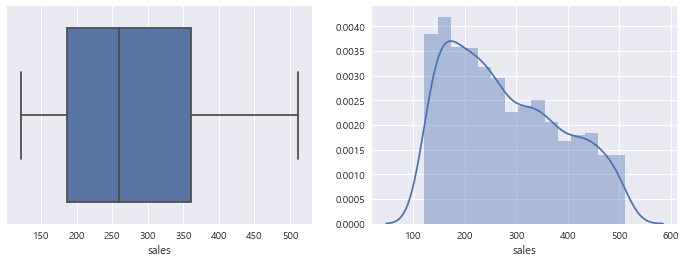

In [31]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(iqr_clothes, ax=ax1)
sns.distplot(iqr_clothes,ax=ax2)

* 못해도 121개는 팔린다 ~! 
* 평균적으로 20분동안 278개정도 팔림 (극한직업에서 현대홈쇼핑은 판매량 목표가 6800세트라고 했는뎀 ...)

#### 가격 (price) 

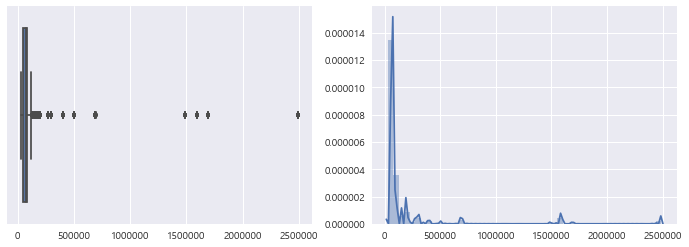

In [33]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(clothes[["price"]], ax=ax1)
sns.distplot(clothes[["price"]],ax=ax2)

In [34]:
clothes.sort_values("price", ascending=False).head(10) # 가격이 쎈건 역시 밍크 

,date,onair,mothercode,productcode,product,group,price,total,sales,BrandCount
2968,2019-08-17 9:30,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,16246000,6.524498,160
2923,2019-08-12 13:50,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,40704000,16.346988,160
3067,2019-08-28 12:50,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,68583000,27.543373,160
2883,2019-08-09 6:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
3007,2019-08-21 10:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,7773000,3.121687,160
3006,2019-08-21 10:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2882,2019-08-09 6:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0.020080,160
2918,2019-08-12 13:00,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,8181000,3.285542,160
2919,2019-08-12 13:10,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,12263000,4.924900,160
3127,2019-09-08 10:50,10.0,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,81347000,32.669478,160


In [36]:
# 이상치 이외의 판매량 분포 
iqr_clothes2 = clothes['price'][clothes['price'].between(clothes['price'].quantile(.25), clothes['price'].quantile(.75), inclusive=True)]

In [37]:
iqr_clothes2.describe() 

count     2474.000000
mean     64037.833468
std      10136.376558
min      49000.000000
25%      59000.000000
50%      59900.000000
75%      69900.000000
max      79900.000000
Name: price, dtype: float64

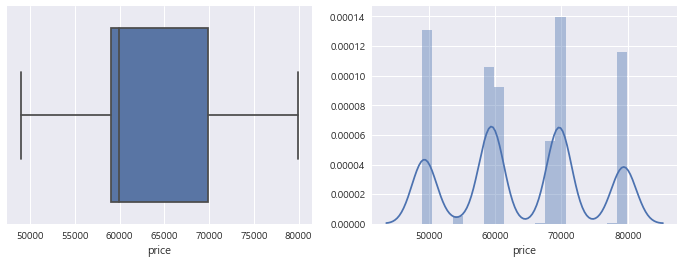

In [38]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(iqr_clothes2, ax=ax1)
sns.distplot(iqr_clothes2,ax=ax2)

* 이상치를 제거하고 보면, ns홈쇼핑에서는 대부분 저렴한 가격대의 상품을 팔고 있는 것을 알 수 있다 
* 저렴 (그냥 옷) vs 고렴 (밍크) 인듯 ...?? 

#### 판매단가 (price) * 주문량 (sales) = 취급액 (total) 

In [39]:
clothes[["price", "sales", "total"]].corr()

,price,sales,total
price,1.000000,-0.245699,0.131312
sales,-0.245699,1.000000,0.698774
total,0.131312,0.698774,1.000000


<Figure size 216x216 with 0 Axes>

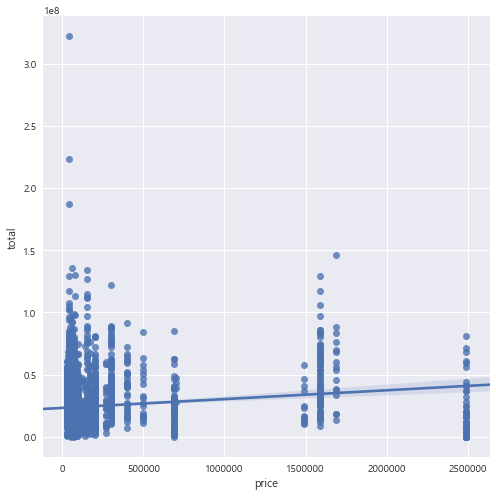

In [47]:
plt.figure(figsize = (3, 3))
sns.lmplot(x="price", y="total", markers = ["o"], height=7, data=clothes)
plt.show()

* 가격이 저렴하다고 해서 많이 팔리고, 총 취급액이 높아지는 것은 아닌 것 같음 

<Figure size 216x216 with 0 Axes>

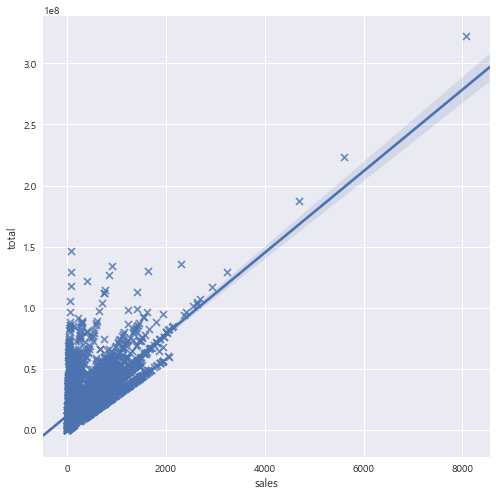

In [48]:
plt.figure(figsize = (3, 3))
sns.lmplot(x="sales", y="total", markers = ["x"], height=7, data=clothes)
plt.show()

* 판매량이 많아질수록 총 취급액 높아짐 (당연한 소리...) 

In [49]:
# 저렴 vs 고렴 추세를 나눠서 살펴보기 
clothes2 = clothes.copy()
clothes2["cheap"] = clothes2["price"].apply(lambda x : 1 if x <= 100000 else 0) # 기준은 십만원 ! 

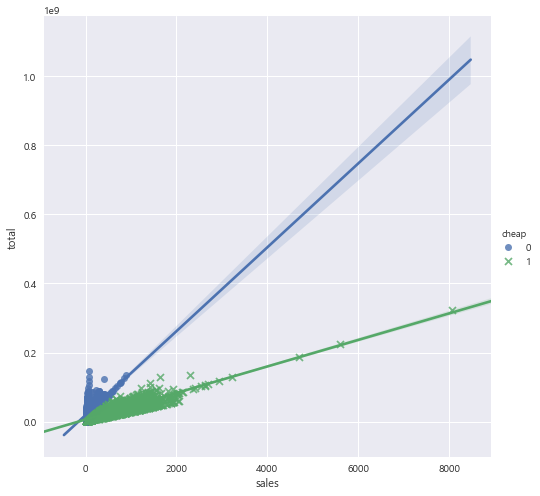

In [51]:
sns.lmplot(x="sales",y="total",hue="cheap", markers = ["o","x"], height=7, data=clothes2)
plt.show()

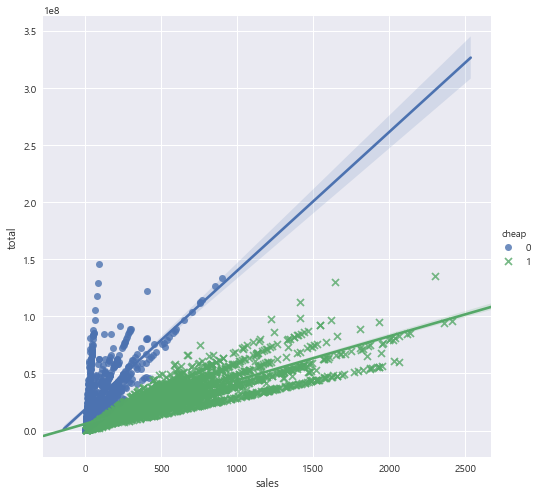

In [53]:
# 보기 힘들어서 넘 튀는 점 제거
clothes2 = clothes2.loc[clothes2["sales"] < 2500]

sns.lmplot(x="sales",y="total",hue="cheap", markers = ["o","x"], height=7, data=clothes2)
plt.show()

* 가격 저렴한 상품들은 많이 팔릴수록 총 취급액 확확 증가 
* 가격 비싼 상품들은 생각보다 크게 판매량에 영향받지는 않는듯 ? 비싸서 잘 안팔려서 .. 
* 기준 좀 세워서 파생변수 만들어도 괜찮을듯 ?? 

# 2. 2019 시청률 데이터 

* 매칭해서 데이터 합치는게 우선 ! 
* 2020.06월 편성표는 월 ~ 토 6:20 ~ 2:20(익일), 일요일은 6:20 ~ 2:00로 구성 (심야시간대 제외)         
  단, raw data의 19.01.01 ~ 19.10.31은 6:00 ~ 2:00로 운영하였음. 11.01부터 6:20 ~ 2:20 운영

In [63]:
rating = pd.read_csv("시청률데이터.csv", encoding="utf-8")

In [55]:
rating.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [66]:
# 마지막 행 : 이게 도대체 무슨 의미일까 ... 문의 메일 넣어 놓음 ! 
rating.iloc[1440] 

시간대                         월화수목금토일02:00-01:59
2019-01-01                               0.004
2019-01-02                               0.006
2019-01-03                               0.002
2019-01-04                               0.003
                                   ...        
2019-12-28                               0.006
2019-12-29                               0.004
2019-12-30                               0.005
2019-12-31                               0.005
2019-01-01 to 2019-12-31                 0.004
Name: 1440, Length: 367, dtype: object

In [65]:
# 마지막 열 
rating['2019-01-01 to 2019-12-31']

0       0.003
1       0.003
2       0.004
3       0.004
4       0.004
        ...  
1436    0.004
1437    0.004
1438    0.004
1439    0.004
1440    0.004
Name: 2019-01-01 to 2019-12-31, Length: 1441, dtype: float64

In [67]:
final_row = rating.iloc[1440] 
final_col = rating['2019-01-01 to 2019-12-31']

In [69]:
rating = rating.iloc[:-1, :-1]
rating.shape

(1440, 366)

In [70]:
rating.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000


In [81]:
pd.DataFrame(final_row).iloc[1:-1][1440]

2019-01-01    0.004
2019-01-02    0.006
2019-01-03    0.002
2019-01-04    0.003
2019-01-05    0.002
              ...  
2019-12-27    0.004
2019-12-28    0.006
2019-12-29    0.004
2019-12-30    0.005
2019-12-31    0.005
Name: 1440, Length: 365, dtype: object

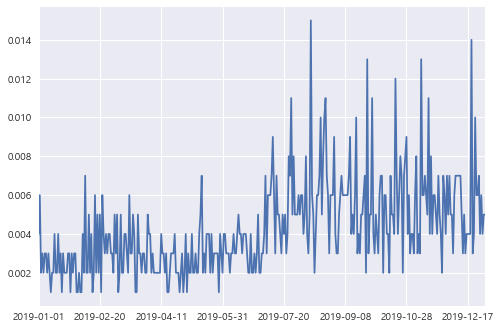

In [85]:
# 날짜에 따른 시청률 
pd.DataFrame(final_row).iloc[1:-1][1440].plot()

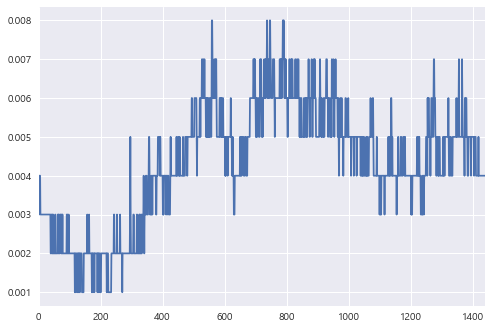

In [86]:
# 시간대에 따른 시청률 
final_col.plot()